In [1]:
import pandas as pd 
data = pd.read_csv('gld_price_data.csv')
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [2]:
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [3]:
# ststistical measures of the dataset
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


<AxesSubplot:>

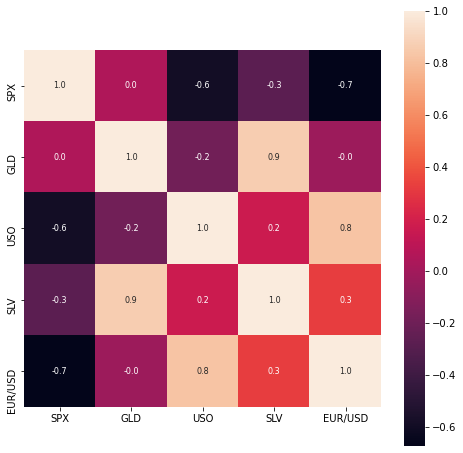

In [4]:
correlation = data.corr()

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,8))
sns.heatmap(correlation, 
            cbar = True, 
            square = True, 
            fmt = '.1f', 
            annot = True, 
            annot_kws = {'size' : 8}, 
            cmap = 'rocket')

C:\Users\Client\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

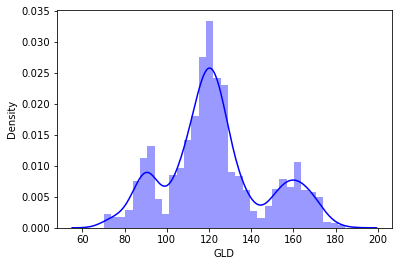

In [5]:
import seaborn as sns
sns.distplot(data['GLD'], color='blue')

In [6]:
X = data.drop(['Date','GLD'], axis=1)
y = data['GLD']

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.2,
                                                   random_state = 2)

from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
y_pred

array([168.50339935,  81.88620004, 115.98779986, 127.69990071,
       120.59240139, 154.84999726, 150.34959786, 126.05310035,
       117.46899872, 125.93650105, 116.68650102, 171.03880093,
       141.29099814, 168.01739867, 115.01220053, 117.7624006 ,
       138.5168033 , 170.34380059, 159.37670238, 158.01939928,
       155.02429953, 125.19730025, 175.8541993 , 157.18730347,
       125.28430021,  93.88339945,  77.12990028, 120.51559981,
       119.08869904, 167.60989929,  88.27620074, 125.0697999 ,
        91.13150068, 117.71690054, 121.08119888, 137.19760089,
       115.59550133, 115.40030081, 147.09809968, 107.51330107,
       104.31990227,  87.11259804, 126.49400057, 117.91089989,
       153.93429857, 119.64649996, 108.51009994, 108.28239823,
        93.19410071, 127.14879769,  74.71480045, 113.71429942,
       121.15930029, 111.16929899, 118.92589904, 120.40529933,
       159.08089929, 168.27560117, 146.97339595,  85.84439898,
        94.22730032,  86.83749901,  90.55030018, 119.09

In [9]:
rf_params = {'max_depth' : list(range(1,100)),
            'max_features' : [2,3,5,10, 15],
            'n_estimators' : [200, 500, 1000, 2000]}
rf_model = RandomForestRegressor(n_estimators=100)

from sklearn.model_selection import GridSearchCV
rf_cv_model = GridSearchCV(rf_model,
                          rf_params,
                          cv = 10,
                          n_jobs = -1)



In [10]:
rf_cv_model.fit(X_train, y_train)

C:\Users\Client\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.63105279 0.63417623 0.6330417  ...        nan        nan        nan]
  warnings.warn(


GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'max_features': [2, 3, 5, 10, 15],
                         'n_estimators': [200, 500, 1000, 2000]})

In [14]:
rf_cv_model.best_params_

{'max_depth': 29, 'max_features': 3, 'n_estimators': 200}

In [23]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

rf_tuned = RandomForestRegressor(max_depth=40, max_features=3, n_estimators = 200)
rf_tuned.fit(X_train, y_train)

y_pred = rf_tuned.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test, y_pred))
print('mean_squared_error : {}'.format(mse))

r2_score = metrics.r2_score(y_test, y_pred)
print('r2_score : {}'.format(r2_score))

mean_squared_error : 2.325864323226335
r2_score : 0.9897436505647457
